In [1]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# sns.set_palette("Set3")
sns.set_theme()

In [2]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [3]:
# c_file = 'combined'
# c_file = 'combined_fd_Avg'
# c_file = 'demand_pv_temp_forecast_timefeatures_hols'
c_file = 'dataset_v1_0'

data = pd.read_csv(filepath+c_file+csv)
# data = data.drop(data.columns[0], axis=1)

def day_type_cat(day_type):
    if day_type =='Day':
        return 0
    else:
        return 1


In [4]:
data.head()


,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True


In [5]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.00
DATETIME,0.00
TOTALDEMAND,0.00
POWER,70.74
LOCATION,0.00
TEMPERATURE,0.00
FORECASTDEMAND,42.46
Weekday,0.00
Quarter,0.00
Month,0.00


In [6]:
data.shape

(726195, 17)

In [7]:
data.info() # Date time objects arent date time objects

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['WeekDayNo'] = data['DATETIME'].dt.dayofweek
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])
data['DAYTYPE_no'] = data['DAYTYPE'].apply(day_type_cat)

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()

print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726195 entries, 0 to 726194
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATE           726195 non-null  object 
 1   DATETIME        726195 non-null  object 
 2   TOTALDEMAND     726195 non-null  float64
 3   POWER           212514 non-null  float64
 4   LOCATION        726195 non-null  object 
 5   TEMPERATURE     726183 non-null  float64
 6   FORECASTDEMAND  417844 non-null  float64
 7   Weekday         726195 non-null  object 
 8   Quarter         726195 non-null  int64  
 9   Month           726195 non-null  int64  
 10  Season          726195 non-null  object 
 11  Day             726195 non-null  int64  
 12  Year            726195 non-null  int64  
 13  SUNRISE         726195 non-null  object 
 14  SUNSET          726195 non-null  object 
 15  DAYTYPE         726195 non-null  object 
 16  HOLIDAY         726195 non-null  bool   
dtypes: bool(1)

In [8]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January


In [9]:
data.describe()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year,WeekDayNo,DAYTYPE_no
count,726195.000000,212514.000000,726183.000000,417844.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000,726195.000000
mean,5150.459706,314.059966,18.750729,5996.960031,2.489187,6.463139,15.694263,2015.431065,2.999933,0.493213
std,2695.260017,478.144853,6.010580,2708.381711,1.125204,3.476231,8.795404,3.148891,2.000311,0.499954
min,21.890000,0.000000,-1.300000,191.467609,1.000000,1.000000,1.000000,2010.000000,0.000000,0.000000
25%,1861.545000,0.000000,14.400000,4568.020691,1.000000,3.000000,8.000000,2013.000000,1.000000,0.000000
50%,5591.150000,3.852000,19.000000,6411.130926,2.000000,6.000000,16.000000,2016.000000,3.000000,0.000000
75%,7017.870000,525.308250,23.000000,8006.319180,3.000000,9.000000,23.000000,2018.000000,5.000000,1.000000
max,14579.860000,2565.377000,44.700000,14601.171964,4.000000,12.000000,31.000000,2021.000000,6.000000,1.000000


In [10]:
tdata = data
data.isnull().sum()


STATE                  0
DATETIME               0
TOTALDEMAND            0
POWER             513681
LOCATION               0
TEMPERATURE           12
FORECASTDEMAND    308351
Weekday                0
Quarter                0
Month                  0
Season                 0
Day                    0
Year                   0
SUNRISE                0
SUNSET                 0
DAYTYPE                0
HOLIDAY                0
WeekDayNo              0
DAYTYPE_no             0
Month Name             0
dtype: int64

In [11]:
data.shape

(726195, 20)

In [12]:
data.nunique()

STATE                  4
DATETIME          196513
TOTALDEMAND       445470
POWER             104430
LOCATION               4
TEMPERATURE          448
FORECASTDEMAND    417724
Weekday                7
Quarter                4
Month                 12
Season                 4
Day                   31
Year                  12
SUNRISE            15028
SUNSET             15031
DAYTYPE                2
HOLIDAY                2
WeekDayNo              7
DAYTYPE_no             2
Month Name            12
dtype: int64

In [13]:
data.columns

Index(['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'LOCATION', 'TEMPERATURE',
       'FORECASTDEMAND', 'Weekday', 'Quarter', 'Month', 'Season', 'Day',
       'Year', 'SUNRISE', 'SUNSET', 'DAYTYPE', 'HOLIDAY', 'WeekDayNo',
       'DAYTYPE_no', 'Month Name'],
      dtype='object')

In [14]:
data = data[data['POWER'].notna()]

In [15]:
data.isnull().sum()

STATE             0
DATETIME          0
TOTALDEMAND       0
POWER             0
LOCATION          0
TEMPERATURE       6
FORECASTDEMAND    0
Weekday           0
Quarter           0
Month             0
Season            0
Day               0
Year              0
SUNRISE           0
SUNSET            0
DAYTYPE           0
HOLIDAY           0
WeekDayNo         0
DAYTYPE_no        0
Month Name        0
dtype: int64

In [16]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.0
DATETIME,0.0
TOTALDEMAND,0.0
POWER,0.0
LOCATION,0.0
TEMPERATURE,0.0
FORECASTDEMAND,0.0
Weekday,0.0
Quarter,0.0
Month,0.0


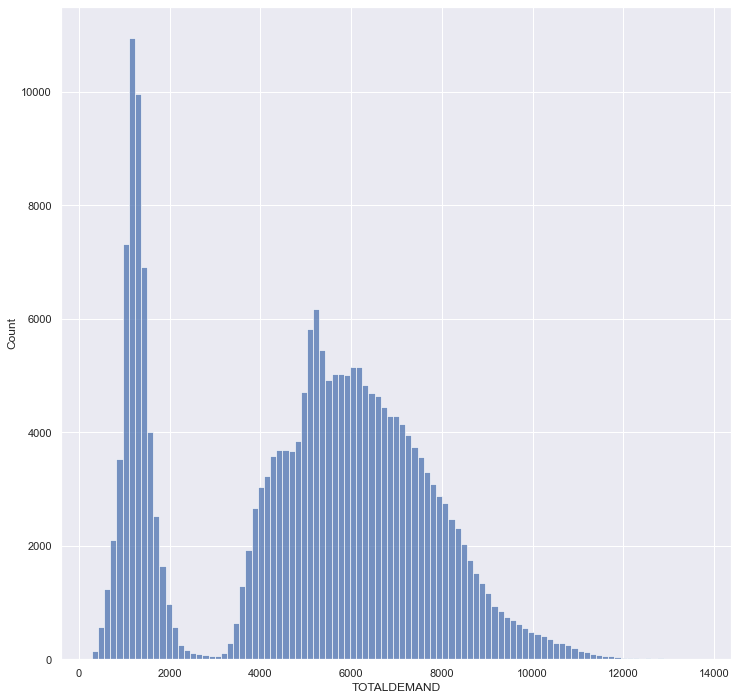

In [17]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TOTALDEMAND")
plt.show()

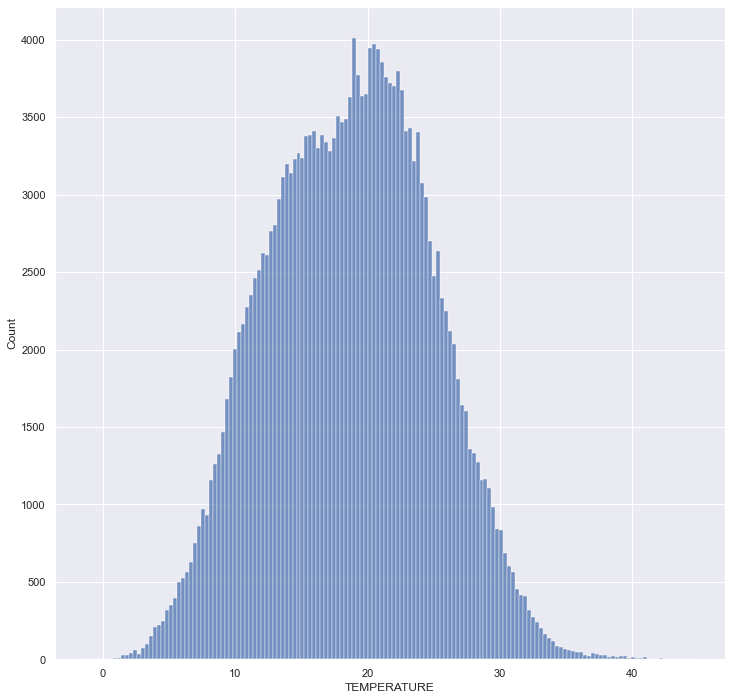

In [18]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TEMPERATURE")
plt.show()

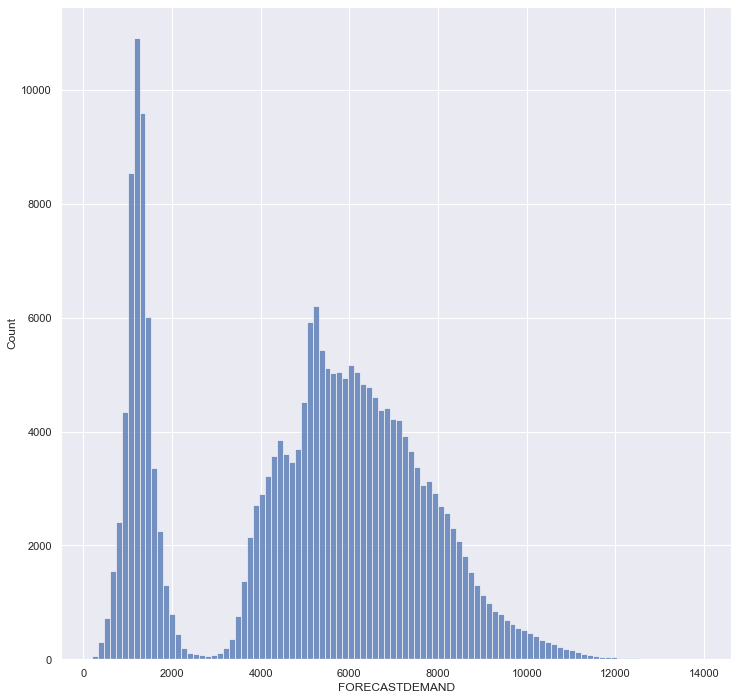

In [19]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="FORECASTDEMAND")
plt.show()

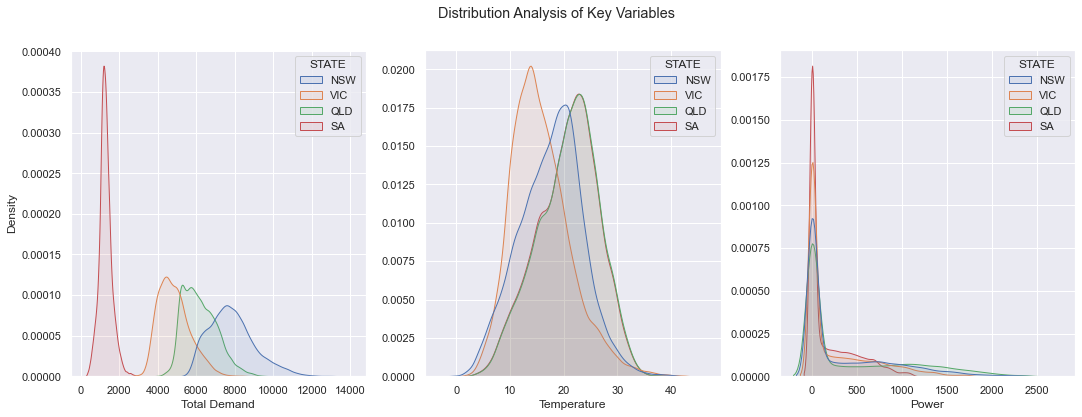

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Analysis of Key Variables')

# Bulbasaur
sns.kdeplot(ax=axes[0],data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Total Demand')
axes[0].set_ylabel('Density')


# Charmander
sns.kdeplot(ax=axes[1],data=data, x='TEMPERATURE', hue='STATE', fill=True, alpha=0.1)
# axes[1].set_title("Test2")
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('')

# Squirtle
sns.kdeplot(ax=axes[2],data=data, x='POWER', hue='STATE', fill=True, alpha=0.1)
# axes[2].set_title("Test3")
axes[2].set_xlabel('Power')
axes[2].set_ylabel('')

# axes.set_ylabel('test2')

plt.savefig(images+'Distribution.png',bbox_inches='tight')

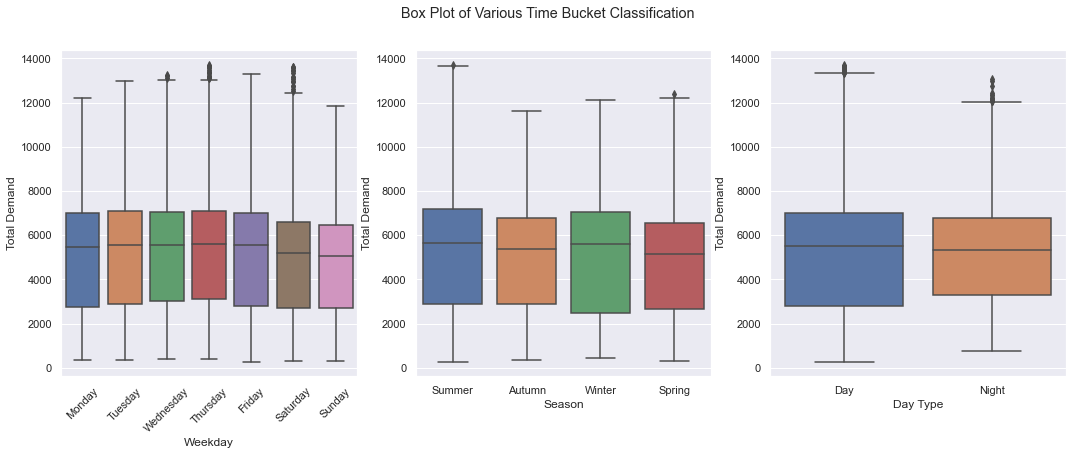

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plot of Various Time Bucket Classification')


sns.boxplot(ax=axes[0],data=data, x=data['Weekday'], y='TOTALDEMAND',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Weekday')
axes[0].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
axes[0].set_ylabel('Total Demand')


sns.boxplot(ax=axes[1],data=data, x=data['Season'], y='TOTALDEMAND',order=['Summer', 'Autumn', 'Winter', 'Spring'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Total Demand')


sns.boxplot(ax=axes[2],data=data,x=data['DAYTYPE'], y='TOTALDEMAND',order=['Day','Night'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[2].set_xlabel('Day Type')
axes[2].set_ylabel('Total Demand')

# axes.set_ylabel('test2')

plt.savefig(images+'BoxPlots.png',bbox_inches='tight')

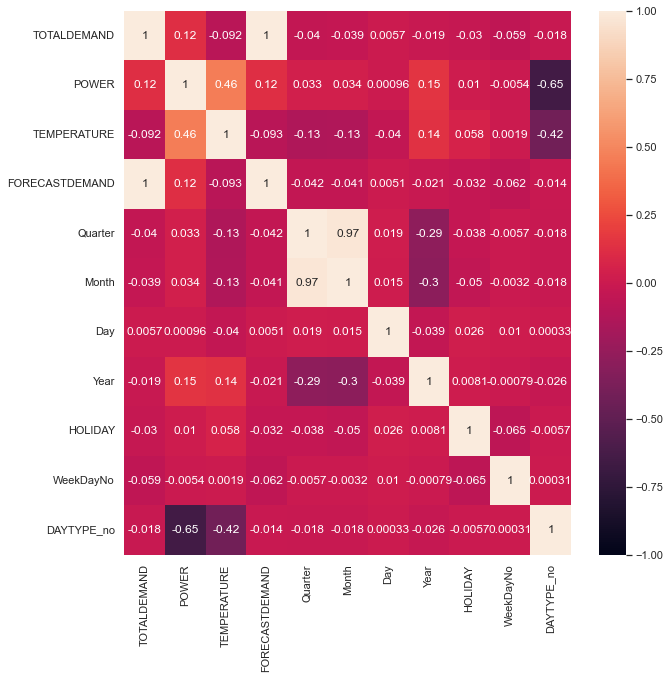

In [22]:
plt.figure(figsize=(10,10))
# mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig(images+'CorrelationHeatMap.png',bbox_inches='tight')
plt.show()

In [23]:
df = data[['STATE', 'DATETIME', 'TEMPERATURE', 'TOTALDEMAND', 'POWER', 'FORECASTDEMAND', 'Season','DAYTYPE','HOLIDAY']]
df['DATETIME'] = df["DATETIME"].dt.date
df.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_8484/3131639390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATETIME'] = df["DATETIME"].dt.date


,STATE,DATETIME,TEMPERATURE,TOTALDEMAND,POWER,FORECASTDEMAND,Season,DAYTYPE,HOLIDAY
513474,NSW,2018-03-06,21.8,8325.67,427.281,8432.046190,Autumn,Day,False
513475,NSW,2018-03-06,21.5,8338.62,495.195,8413.074419,Autumn,Day,False
513476,NSW,2018-03-06,22.7,8323.66,516.137,8367.147273,Autumn,Day,False
513477,NSW,2018-03-06,22.1,8264.99,549.542,8334.082667,Autumn,Day,False
513478,NSW,2018-03-06,22.5,8247.11,556.764,8289.618478,Autumn,Day,False


In [24]:
df_day_temp = df.groupby(['STATE','DATETIME','Season','HOLIDAY']).mean().reset_index()
df_day_temp2 = df_day_temp[['STATE', 'DATETIME', 'TEMPERATURE']]
df_day_temp2.head()

,STATE,DATETIME,TEMPERATURE
0,NSW,2018-03-06,20.789655
1,NSW,2018-03-07,20.700000
2,NSW,2018-03-08,19.956818
3,NSW,2018-03-09,21.741667
4,NSW,2018-03-10,21.102083


In [25]:
df_day = df.groupby(['STATE','DATETIME','Season','HOLIDAY']).sum().reset_index()
df_day = df_day.drop(['TEMPERATURE'], axis=1)
df_day.head()

,STATE,DATETIME,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND
0,NSW,2018-03-06,Autumn,False,236312.82,7789.761,239809.575953
1,NSW,2018-03-07,Autumn,False,370909.09,12044.845,372222.137360
2,NSW,2018-03-08,Autumn,False,341393.68,8789.044,340483.101176
3,NSW,2018-03-09,Autumn,False,375107.27,11446.882,374219.958493
4,NSW,2018-03-10,Autumn,False,344822.89,11759.262,343985.909384


In [26]:
df_day2 = df_day.merge(df_day_temp2, left_on=['STATE','DATETIME'], right_on = ['STATE','DATETIME'],how = 'outer')
df_day2.head()

,STATE,DATETIME,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND,TEMPERATURE
0,NSW,2018-03-06,Autumn,False,236312.82,7789.761,239809.575953,20.789655
1,NSW,2018-03-07,Autumn,False,370909.09,12044.845,372222.137360,20.700000
2,NSW,2018-03-08,Autumn,False,341393.68,8789.044,340483.101176,19.956818
3,NSW,2018-03-09,Autumn,False,375107.27,11446.882,374219.958493,21.741667
4,NSW,2018-03-10,Autumn,False,344822.89,11759.262,343985.909384,21.102083


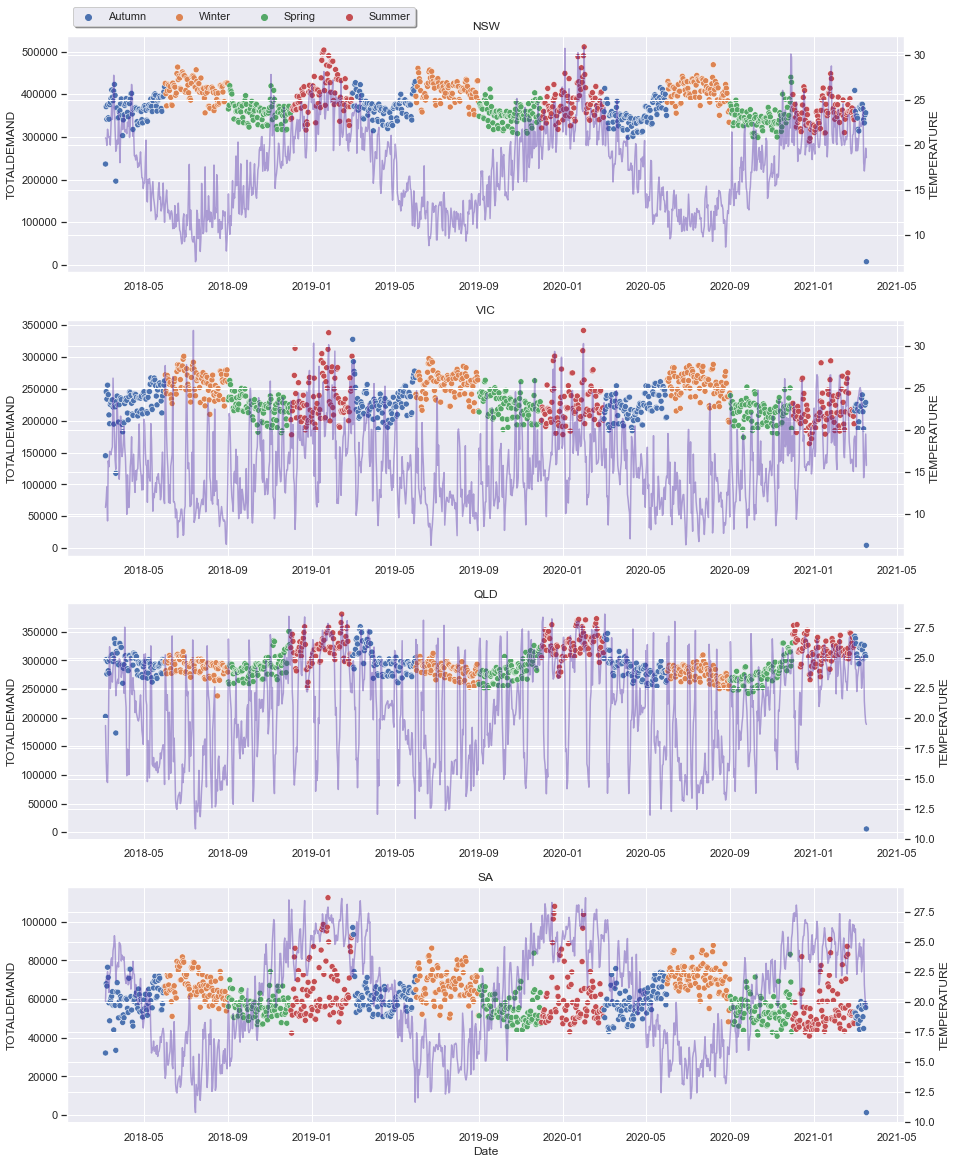

In [27]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'NSW'],hue="Season")
ax = plt.twinx(axes[0])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'TEMPERATURE', data = df_day2.loc[df_day2['STATE'] == 'NSW'], color='#4c26a6',alpha  = 0.4)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)

sns.scatterplot(ax=axes[1],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'VIC'],hue="Season")
ax = plt.twinx(axes[1])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'TEMPERATURE', data = df_day2.loc[df_day2['STATE'] == 'VIC'], color='#4c26a6',alpha  = 0.4)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('TOTALDEMAND')
axes[1].legend([],[], frameon=False)


sns.scatterplot(ax=axes[2],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'QLD'],hue="Season")
ax = plt.twinx(axes[2])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'TEMPERATURE', data = df_day2.loc[df_day2['STATE'] == 'QLD'], color='#4c26a6',alpha  = 0.4)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('TOTALDEMAND')
axes[2].legend([],[], frameon=False)


sns.scatterplot(ax=axes[3],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'SA'],hue="Season")
ax = plt.twinx(axes[3])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'TEMPERATURE', data = df_day2.loc[df_day2['STATE'] == 'SA'], color='#4c26a6',alpha  = 0.4)
axes[3].set_title("SA")
axes[3].set_xlabel('Date')
axes[3].set_ylabel('TOTALDEMAND')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'DemandTrendSeason.png',bbox_inches='tight')

In [28]:
df2 = data[['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'FORECASTDEMAND', 'Season','DAYTYPE','HOLIDAY']]
df2['Hour'] = df2["DATETIME"].dt.hour
df2.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_8484/4030526165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour'] = df2["DATETIME"].dt.hour


,STATE,DATETIME,TOTALDEMAND,POWER,FORECASTDEMAND,Season,DAYTYPE,HOLIDAY,Hour
513474,NSW,2018-03-06 09:30:00,8325.67,427.281,8432.046190,Autumn,Day,False,9
513475,NSW,2018-03-06 10:00:00,8338.62,495.195,8413.074419,Autumn,Day,False,10
513476,NSW,2018-03-06 10:30:00,8323.66,516.137,8367.147273,Autumn,Day,False,10
513477,NSW,2018-03-06 11:00:00,8264.99,549.542,8334.082667,Autumn,Day,False,11
513478,NSW,2018-03-06 11:30:00,8247.11,556.764,8289.618478,Autumn,Day,False,11


In [29]:
df_hour = df2.groupby(['STATE','Hour','DAYTYPE']).mean().reset_index()

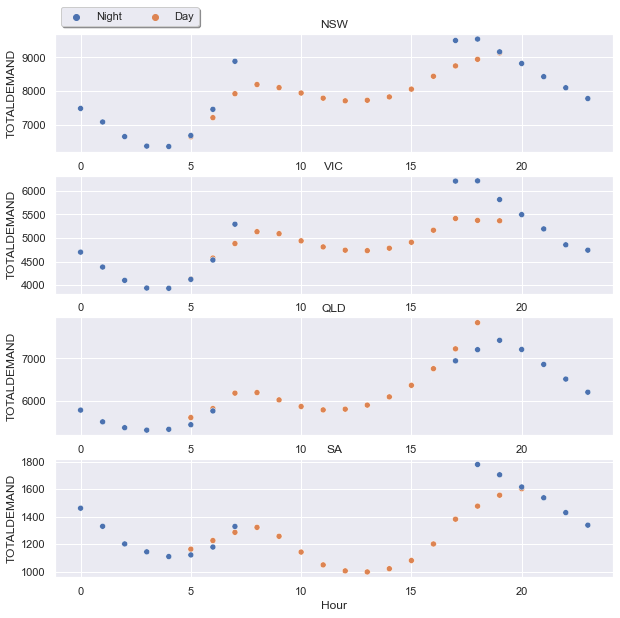

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'NSW'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)


sns.scatterplot(ax=axes[1],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'VIC'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('TOTALDEMAND')
axes[1].legend([],[], frameon=False)

sns.scatterplot(ax=axes[2],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'QLD'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('TOTALDEMAND')
axes[2].legend([],[], frameon=False)

sns.scatterplot(ax=axes[3],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'SA'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[3].set_title("SA")
axes[3].set_xlabel('Hour')
axes[3].set_ylabel('TOTALDEMAND')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'HourlyDemandTrendAvg.png',bbox_inches='tight')

In [31]:
df_day2['DATETIME'] = pd.to_datetime(df_day2['DATETIME'])
df_day2['WEEKDAY'] = df_day2['DATETIME'].dt.day_name()
df_day2 = df_day2.drop(['TEMPERATURE'], axis=1)
df_day2.head()

,STATE,DATETIME,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND,WEEKDAY
0,NSW,2018-03-06,Autumn,False,236312.82,7789.761,239809.575953,Tuesday
1,NSW,2018-03-07,Autumn,False,370909.09,12044.845,372222.137360,Wednesday
2,NSW,2018-03-08,Autumn,False,341393.68,8789.044,340483.101176,Thursday
3,NSW,2018-03-09,Autumn,False,375107.27,11446.882,374219.958493,Friday
4,NSW,2018-03-10,Autumn,False,344822.89,11759.262,343985.909384,Saturday


In [32]:
df_weekday = df_day2.groupby(['STATE','WEEKDAY','Season']).mean().reset_index()
df_weekday['WEEKDAY'] = pd.Categorical(df_weekday['WEEKDAY'],categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_weekday.head()

,STATE,WEEKDAY,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND
0,NSW,Friday,Autumn,0.073171,372499.880488,13825.043634,372302.677658
1,NSW,Friday,Spring,0.000000,360925.621795,20912.963436,359152.728523
2,NSW,Friday,Summer,0.052632,389489.381053,22671.484605,389240.255531
3,NSW,Friday,Winter,0.000000,417958.404250,11851.418825,416473.123104
4,NSW,Monday,Autumn,0.073171,371075.659756,14721.146098,371285.246546


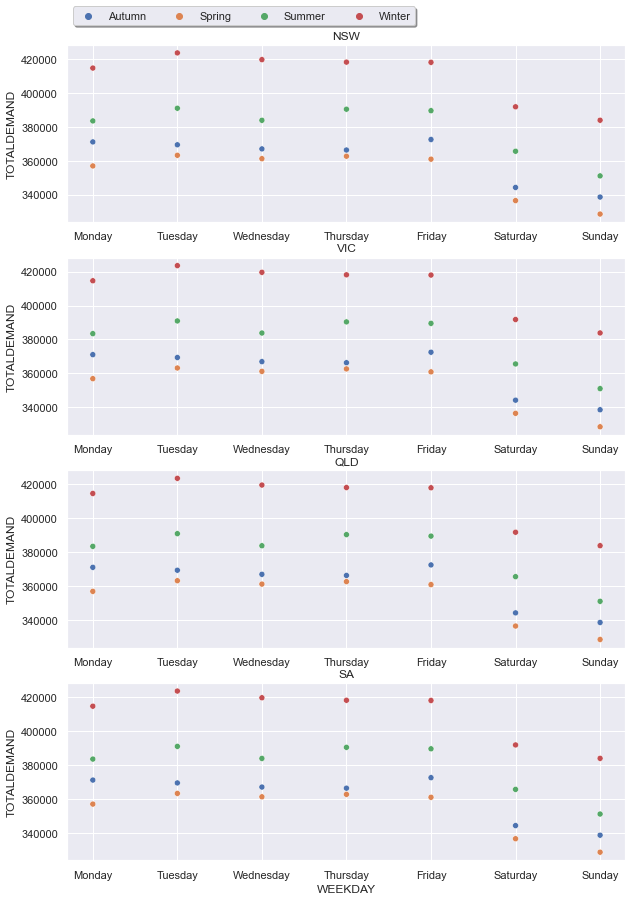

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(10, 15))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.08), fancybox=True, shadow=True, ncol=5)


sns.scatterplot(ax=axes[1],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('TOTALDEMAND')
axes[1].legend([],[], frameon=False)

sns.scatterplot(ax=axes[2],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('TOTALDEMAND')
axes[2].legend([],[], frameon=False)

sns.scatterplot(ax=axes[3],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[3].set_title("SA")
axes[3].set_xlabel('WEEKDAY')
axes[3].set_ylabel('TOTALDEMAND')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'WeekdayDemandTrendAvg.png',bbox_inches='tight')

In [34]:
tdata.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January


In [35]:
df_year = tdata.groupby(['STATE','Year']).sum().reset_index()
df_year

,STATE,Year,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,HOLIDAY,WeekDayNo,DAYTYPE_no
0,NSW,2010,1.543019e+08,0.000,303884.2,1.550784e+08,43968,114336,275424,672,52608,8673
1,NSW,2011,1.529197e+08,0.000,300153.7,1.537066e+08,43968,114336,275424,624,52656,8671
2,NSW,2012,1.449939e+08,0.000,294474.4,1.458106e+08,44016,114432,276816,624,52704,8691
3,NSW,2013,1.398375e+08,0.000,306903.5,1.402087e+08,43968,114336,275424,624,52464,8674
4,NSW,2014,1.387199e+08,0.000,307016.7,1.380821e+08,43968,114336,275424,624,52512,8673
5,NSW,2015,1.398054e+08,0.000,297158.2,1.386539e+08,43968,114336,275424,624,52560,8672
6,NSW,2016,1.401571e+08,0.000,316312.8,1.389328e+08,44016,114432,276816,624,52848,8690
7,NSW,2017,1.411039e+08,0.000,312640.5,1.405699e+08,43968,114336,275424,624,52704,8674
8,NSW,2018,1.401582e+08,3532474.407,308030.1,1.400667e+08,43968,114336,275424,576,52416,8673
9,NSW,2019,1.395390e+08,5894163.562,311757.4,1.392865e+08,43968,114336,275424,624,52464,8673


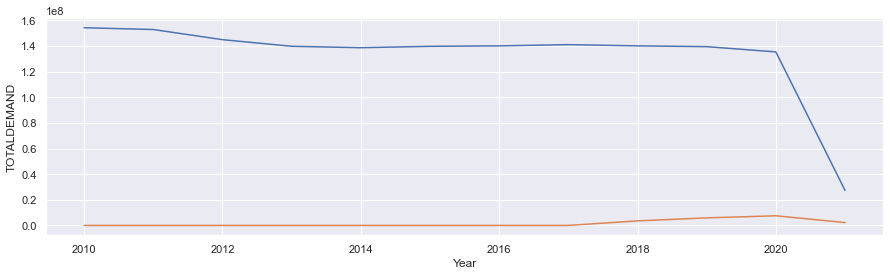

In [36]:
plt.figure(figsize=(15,4))
# fig, axes = plt.subplots(4, 1, figsize=(15, 20))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.lineplot(x = 'Year', y = 'TOTALDEMAND', data = df_year.loc[df_year['STATE'] == 'NSW'])
sns.lineplot(x = 'Year', y = 'POWER', data = df_year.loc[df_year['STATE'] == 'NSW'])
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)

In [37]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
513474,NSW,2018-03-06 09:30:00,8325.67,427.281,Bankstown,21.8,8432.046190,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513475,NSW,2018-03-06 10:00:00,8338.62,495.195,Bankstown,21.5,8413.074419,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513476,NSW,2018-03-06 10:30:00,8323.66,516.137,Bankstown,22.7,8367.147273,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513477,NSW,2018-03-06 11:00:00,8264.99,549.542,Bankstown,22.1,8334.082667,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March
513478,NSW,2018-03-06 11:30:00,8247.11,556.764,Bankstown,22.5,8289.618478,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:48:00,2018-03-06 18:27:00,Day,False,1,0,March


In [38]:
df_qld = data.loc[data['STATE'] == 'QLD']

In [39]:
df_qld.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name
513570,QLD,2018-03-06 09:30:00,7151.35,366.864,Brisbane Archerfield Airport,17.9,7134.996667,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:44:00,2018-03-06 18:15:00,Day,False,1,0,March
513571,QLD,2018-03-06 10:00:00,7133.61,413.097,Brisbane Archerfield Airport,19.6,7128.554651,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:44:00,2018-03-06 18:15:00,Day,False,1,0,March
513572,QLD,2018-03-06 10:30:00,7116.99,446.329,Brisbane Archerfield Airport,19.8,7157.128636,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:44:00,2018-03-06 18:15:00,Day,False,1,0,March
513573,QLD,2018-03-06 11:00:00,7129.42,437.118,Brisbane Archerfield Airport,21.9,7164.565556,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:44:00,2018-03-06 18:15:00,Day,False,1,0,March
513574,QLD,2018-03-06 11:30:00,7112.06,481.786,Brisbane Archerfield Airport,22.2,7165.201522,Tuesday,1,3,Autumn,6,2018,2018-03-06 05:44:00,2018-03-06 18:15:00,Day,False,1,0,March


In [90]:
df_temp_qld = df_qld[['DATETIME', 'TEMPERATURE','Season','DAYTYPE']]
df_temp_qld['DATE'] = df_temp_qld["DATETIME"].dt.date
df_temp_qld['DATE'] = pd.to_datetime(df_temp_qld['DATE'])
df_temp_qld['HOUR'] = df_temp_qld["DATETIME"].dt.hour

df_temp_qld.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_8484/3429096651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_qld['DATE'] = df_temp_qld["DATETIME"].dt.date
C:\Users\rahul\AppData\Local\Temp/ipykernel_8484/3429096651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_qld['DATE'] = pd.to_datetime(df_temp_qld['DATE'])
C:\Users\rahul\AppData\Local\Temp/ipykernel_8484/3429096651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,DATETIME,TEMPERATURE,Season,DAYTYPE,DATE,HOUR
513570,2018-03-06 09:30:00,17.9,Autumn,Day,2018-03-06,9
513571,2018-03-06 10:00:00,19.6,Autumn,Day,2018-03-06,10
513572,2018-03-06 10:30:00,19.8,Autumn,Day,2018-03-06,10
513573,2018-03-06 11:00:00,21.9,Autumn,Day,2018-03-06,11
513574,2018-03-06 11:30:00,22.2,Autumn,Day,2018-03-06,11


In [91]:
df_temp_qld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53122 entries, 513570 to 726192
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     53122 non-null  datetime64[ns]
 1   TEMPERATURE  53122 non-null  float64       
 2   Season       53122 non-null  object        
 3   DAYTYPE      53122 non-null  object        
 4   DATE         53122 non-null  datetime64[ns]
 5   HOUR         53122 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [110]:
test = df_temp_qld[(df_temp_qld['DATE'] == '2018-08-04')]
# test = df_temp_qld[(df_temp_qld['DATE'] == '2018-04-06')]
test

,DATETIME,TEMPERATURE,Season,DAYTYPE,DATE,HOUR
542495,2018-08-04 00:00:00,18.8,Winter,Night,2018-08-04,0
542496,2018-08-04 00:30:00,17.9,Winter,Night,2018-08-04,0
542497,2018-08-04 01:00:00,19.2,Winter,Night,2018-08-04,1
542498,2018-08-04 01:30:00,19.1,Winter,Night,2018-08-04,1
542499,2018-08-04 02:00:00,18.4,Winter,Night,2018-08-04,2
542500,2018-08-04 02:30:00,17.8,Winter,Night,2018-08-04,2
542501,2018-08-04 03:00:00,17.5,Winter,Night,2018-08-04,3
542502,2018-08-04 03:30:00,16.9,Winter,Night,2018-08-04,3
542503,2018-08-04 04:00:00,17.3,Winter,Night,2018-08-04,4
542504,2018-08-04 04:30:00,16.9,Winter,Night,2018-08-04,4


<AxesSubplot:xlabel='DATETIME', ylabel='TEMPERATURE'>

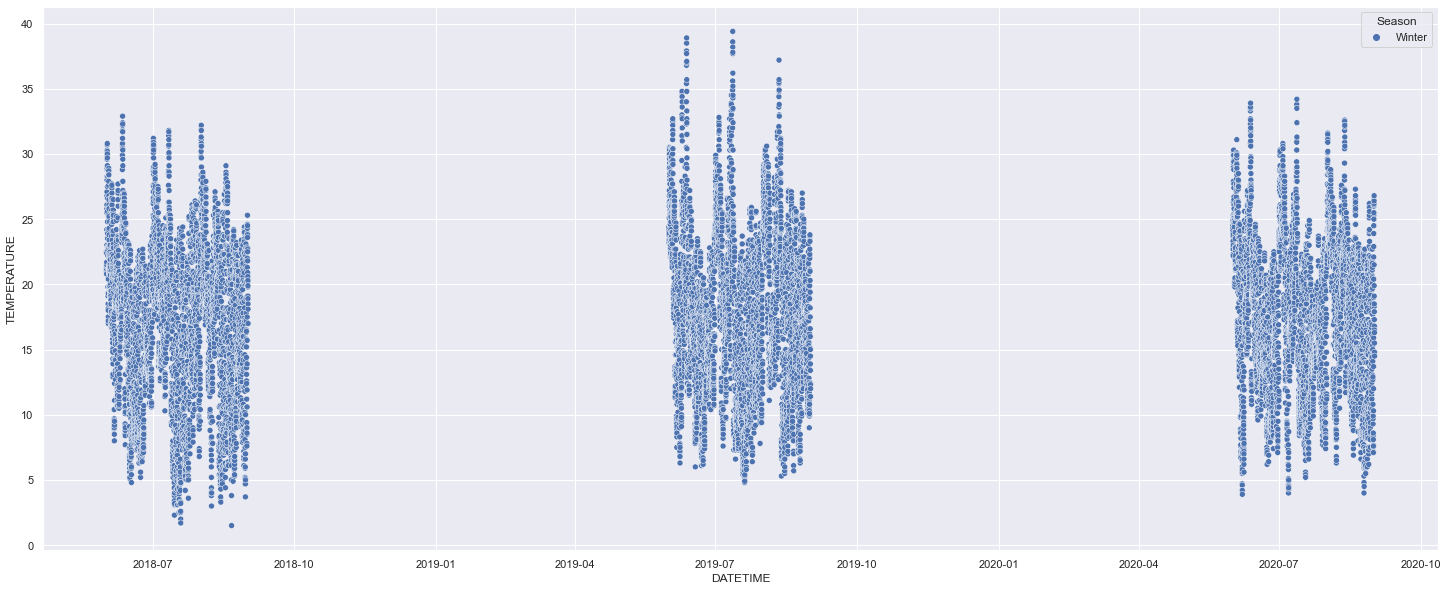

In [107]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'DATETIME', y = 'TEMPERATURE', data = df_temp_qld.loc[df_temp_qld['Season'] == 'Winter'], hue = 'Season')

<AxesSubplot:xlabel='HOUR', ylabel='TEMPERATURE'>

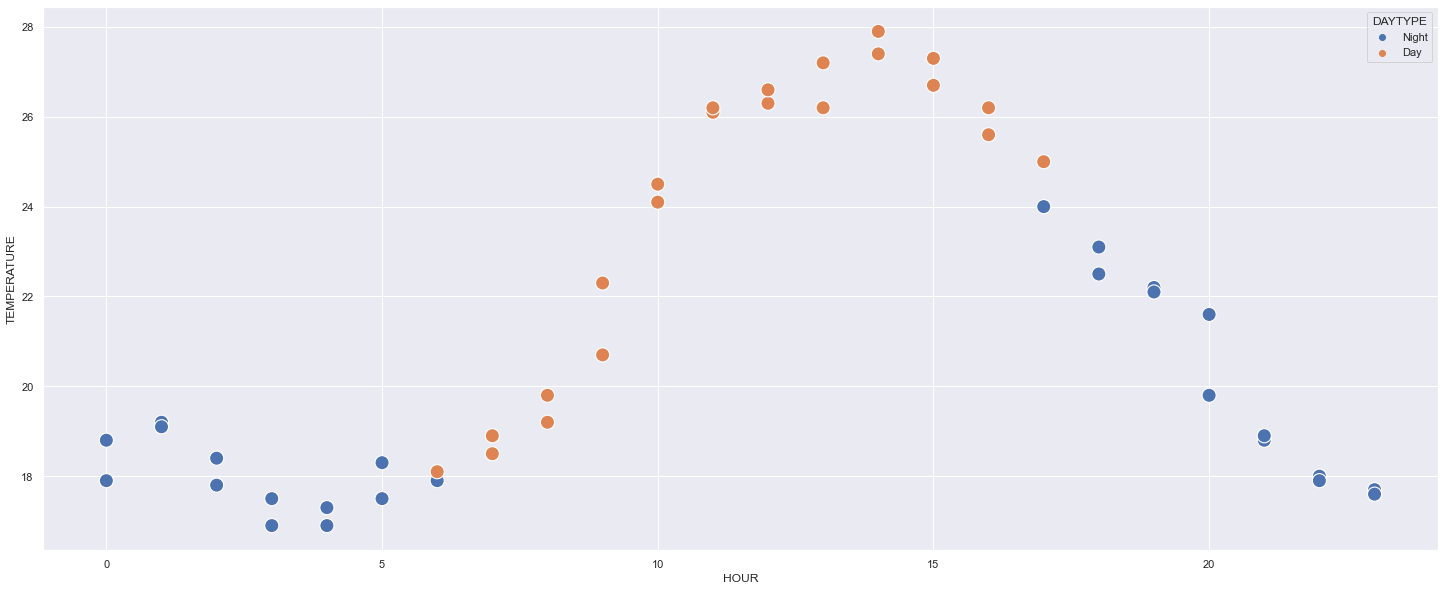

In [109]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'HOUR', y = 'TEMPERATURE', data = test, hue = 'DAYTYPE', s=200)

In [103]:
test2= df_temp_qld.groupby(['DATE','Season']).median().reset_index()
# test2= df_temp_qld.groupby(['HOUR','Season']).mean().reset_index()
test2.head(150)

,DATE,Season,TEMPERATURE,HOUR
0,2018-03-06,Autumn,19.80,16.0
1,2018-03-07,Autumn,16.35,11.5
2,2018-03-08,Autumn,15.15,10.5
3,2018-03-09,Autumn,15.45,11.5
4,2018-03-10,Autumn,18.20,11.5
5,2018-03-11,Autumn,23.45,11.5
6,2018-03-12,Autumn,25.00,11.5
7,2018-03-13,Autumn,22.00,11.5
8,2018-03-14,Autumn,22.55,11.5
9,2018-03-15,Autumn,23.00,11.5


<AxesSubplot:xlabel='DATE', ylabel='TEMPERATURE'>

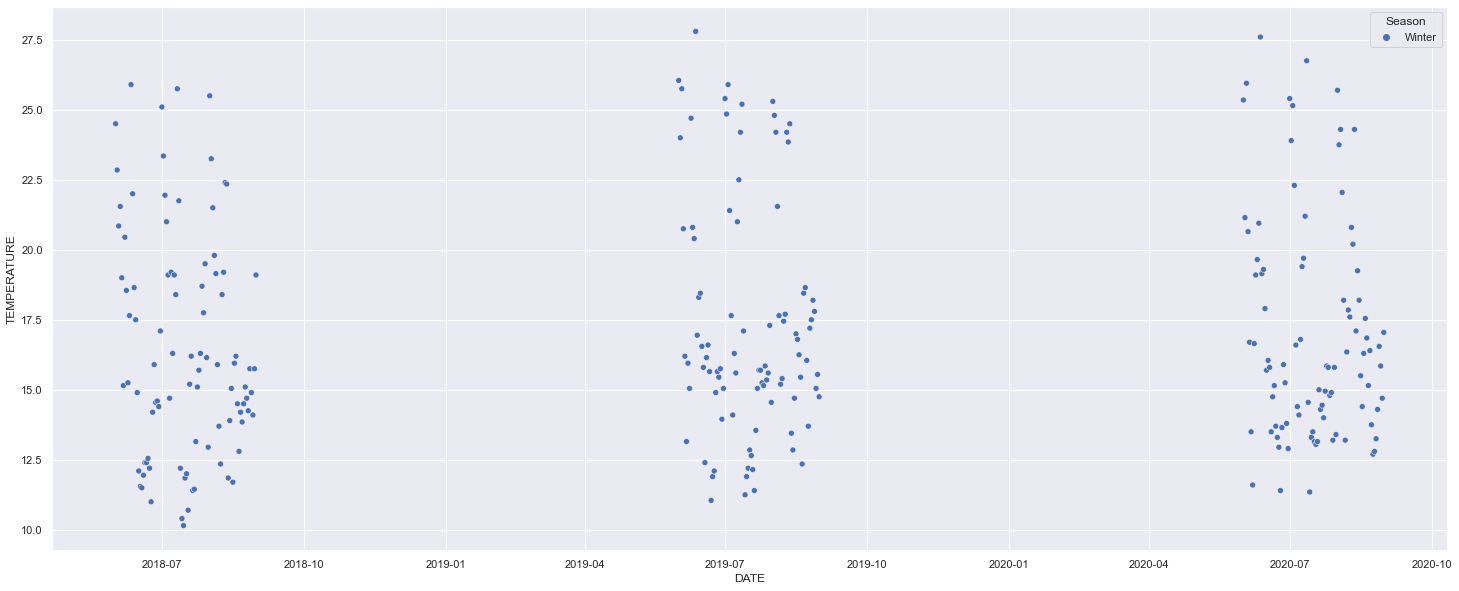

In [104]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'DATE', y = 'TEMPERATURE', data = test2.loc[test2['Season'] == 'Winter'], hue = 'Season')

In [68]:
data['HOLIDAY'].value_counts()

False    204900
True       7614
Name: HOLIDAY, dtype: int64

In [70]:
(7614/(204900+7614))*100

3.5828227787345774

In [ ]:
data_state = data

<AxesSubplot:xlabel='STATE', ylabel='TOTALDEMAND'>

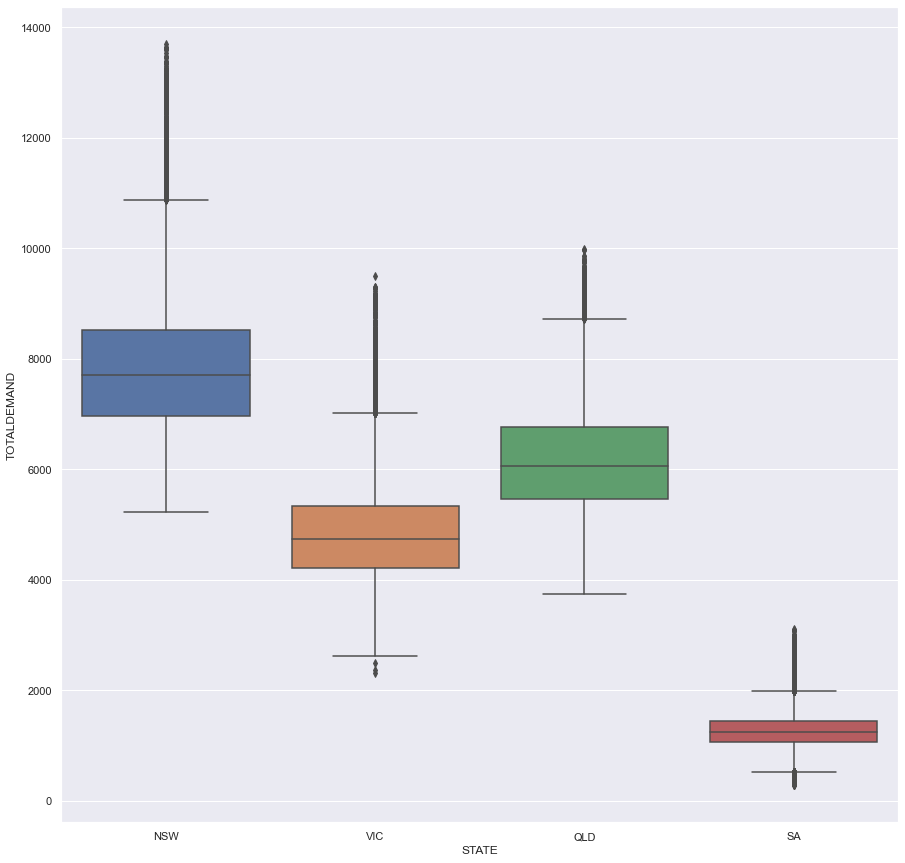

In [114]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data, x=data['STATE'], y='TOTALDEMAND')

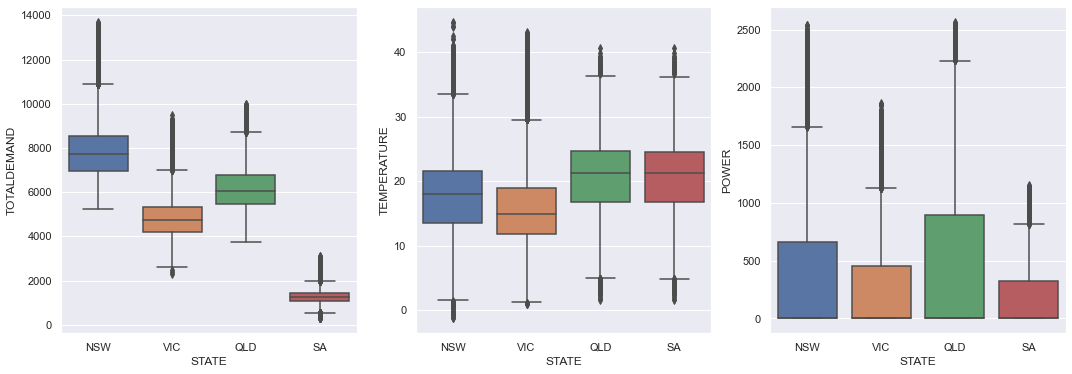

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig.suptitle('Main Data Box Plot')

sns.boxplot(ax=axes[0],data=data, x=data['STATE'], y='TOTALDEMAND')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('STATE')
axes[0].set_ylabel('TOTALDEMAND')


sns.boxplot(ax=axes[1],data=data, x=data['STATE'], y='TEMPERATURE')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[1].set_xlabel('STATE')
axes[1].set_ylabel('TEMPERATURE')


sns.boxplot(ax=axes[2],data=data,x=data['STATE'], y='POWER')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[2].set_xlabel('STATE')
axes[2].set_ylabel('POWER')

# axes.set_ylabel('test2')

plt.savefig(images+'BoxPlots2.png',bbox_inches='tight')

In [138]:
data.groupby(['STATE'])['TOTALDEMAND'].describe().to_csv("tdstat.csv")

In [139]:
data.groupby(['STATE'])['POWER'].describe().to_csv("powerstat.csv")

In [140]:
data.groupby(['STATE'])['TEMPERATURE'].describe().to_csv("tempstat.csv")

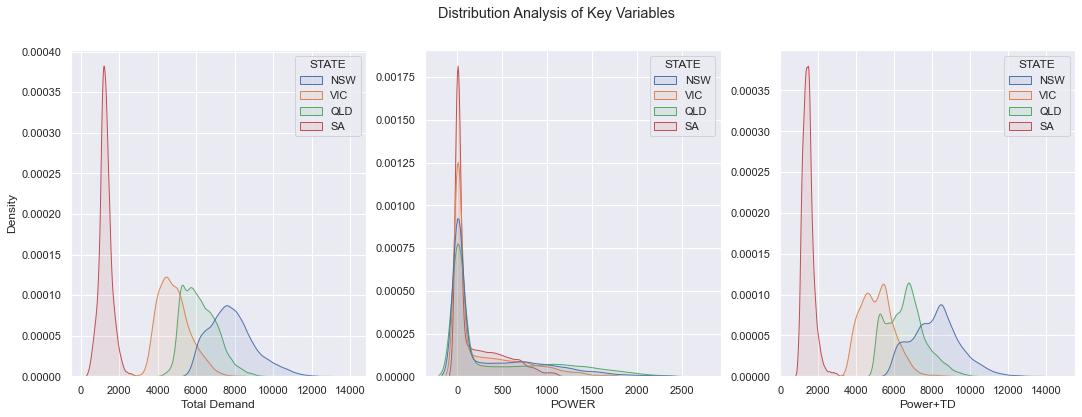

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Analysis of Key Variables')

# Bulbasaur
sns.kdeplot(ax=axes[0],data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Total Demand')
axes[0].set_ylabel('Density')


# Charmander
sns.kdeplot(ax=axes[1],data=data, x='POWER', hue='STATE', fill=True, alpha=0.1)
# axes[1].set_title("Test2")
axes[1].set_xlabel('POWER')
axes[1].set_ylabel('')

# Squirtle
sns.kdeplot(ax=axes[2],data=data, x=data['POWER']+data['TOTALDEMAND'], hue='STATE', fill=True, alpha=0.1)
# axes[2].set_title("Test3")
axes[2].set_xlabel('Power+TD')
axes[2].set_ylabel('')

# axes.set_ylabel('test2')

plt.savefig(images+'TestDistribution.png',bbox_inches='tight')